In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv('/kaggle/input/thyroid-cancer-risk-dataset/thyroid_cancer_risk_data.csv')

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

In [4]:
print(data.head())

   Patient_ID  Age  Gender  Country  Ethnicity Family_History  \
0           1   66    Male   Russia  Caucasian             No   
1           2   29    Male  Germany   Hispanic             No   
2           3   86    Male  Nigeria  Caucasian             No   
3           4   75  Female    India      Asian             No   
4           5   35  Female  Germany    African            Yes   

  Radiation_Exposure Iodine_Deficiency Smoking Obesity Diabetes  TSH_Level  \
0                Yes                No      No      No       No       9.37   
1                Yes                No      No      No       No       1.83   
2                 No                No      No      No       No       6.26   
3                 No                No      No      No       No       4.10   
4                Yes                No      No      No       No       9.10   

   T3_Level  T4_Level  Nodule_Size Thyroid_Cancer_Risk Diagnosis  
0      1.67      6.16         1.08                 Low    Benign  
1     

In [5]:
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
         Patient_ID            Age      TSH_Level       T3_Level  \
count  212691.00000  212691.000000  212691.000000  212691.000000   
mean   106346.00000      51.918497       5.045102       2.001727   
std     61398.74739      21.632815       2.860264       0.866248   
min         1.00000      15.000000       0.100000       0.500000   
25%     53173.50000      33.000000       2.570000       1.250000   
50%    106346.00000      52.000000       5.040000       2.000000   
75%    159518.50000      71.000000       7.520000       2.750000   
max    212691.00000      89.000000      10.000000       3.500000   

            T4_Level    Nodule_Size  
count  212691.000000  212691.000000  
mean        8.246204       2.503403  
std         2.164188       1.444631  
min         4.500000       0.000000  
25%         6.370000       1.250000  
50%         8.240000       2.510000  
75%        10.120000       3.760000  
max        12.000000       5.000000  


In [6]:
# Check missing values
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
Patient_ID             0
Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
Diagnosis              0
dtype: int64


**Some Visualization**

In [7]:
# Convert categorical risk factors into numerical values for correlation analysis
encoding_dict = {
    "Yes": 1, "No": 0,
    "Low": 0, "Medium": 1, "High": 2  # Ordinal encoding for risk levels
}

In [8]:
categorical_features = ["Family_History", "Radiation_Exposure", "Iodine_Deficiency", "Smoking", "Obesity", "Diabetes", "Thyroid_Cancer_Risk"]
data_encoded = data.copy()
for col in categorical_features:
    data_encoded[col] = data_encoded[col].map(encoding_dict)

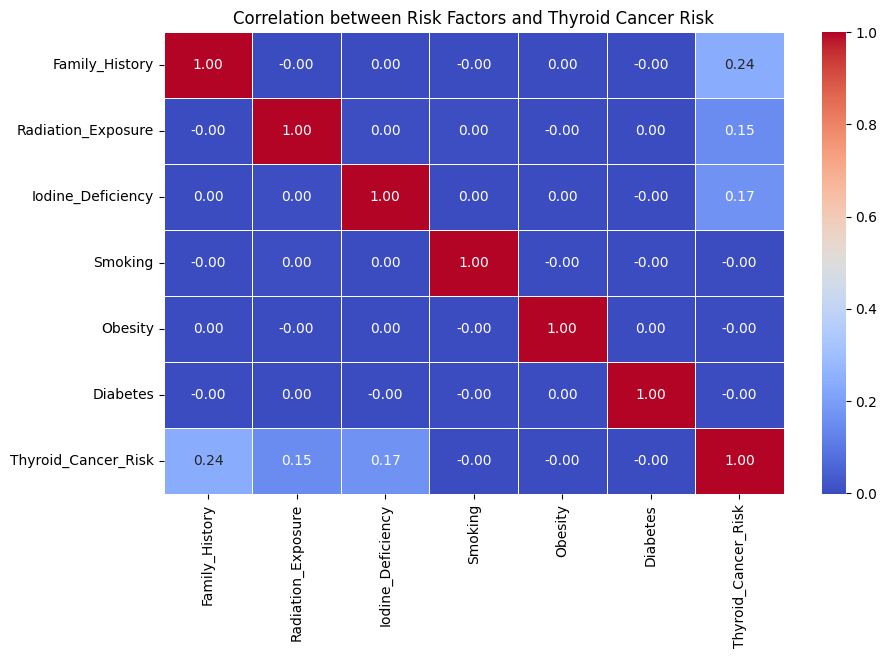

In [9]:
# correlation matrix
correlation_matrix = data_encoded[categorical_features].corr()
# 히트맵 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation between Risk Factors and Thyroid Cancer Risk")
plt.show()

In [10]:
# hormone levels, risk category, diagnosis category 시각화
hormone_levels = ["TSH_Level", "T3_Level", "T4_Level"]
risk_category = "Thyroid_Cancer_Risk"
diagnosis_category = "Diagnosis"

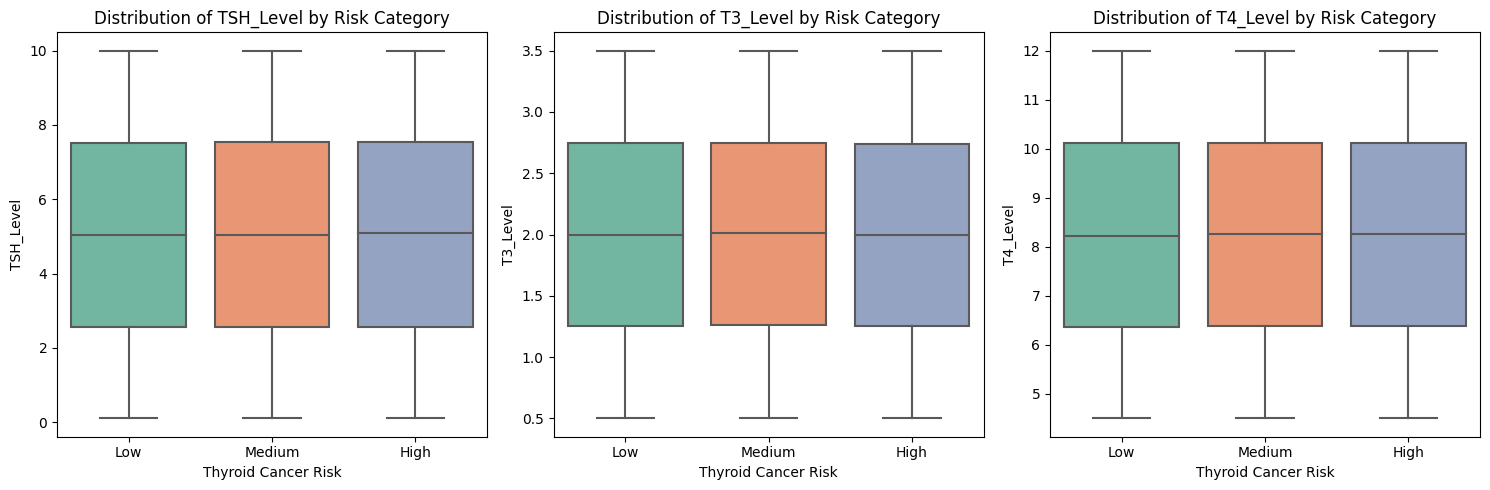

In [11]:
# risk category에 따른 호르몬 레벨
plt.figure(figsize=(15, 5))

for i, hormone in enumerate(hormone_levels, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=data, x=risk_category, y=hormone, palette="Set2")
    plt.title(f"Distribution of {hormone} by Risk Category")
    plt.xlabel("Thyroid Cancer Risk")
    plt.ylabel(hormone)

plt.tight_layout()
plt.show()

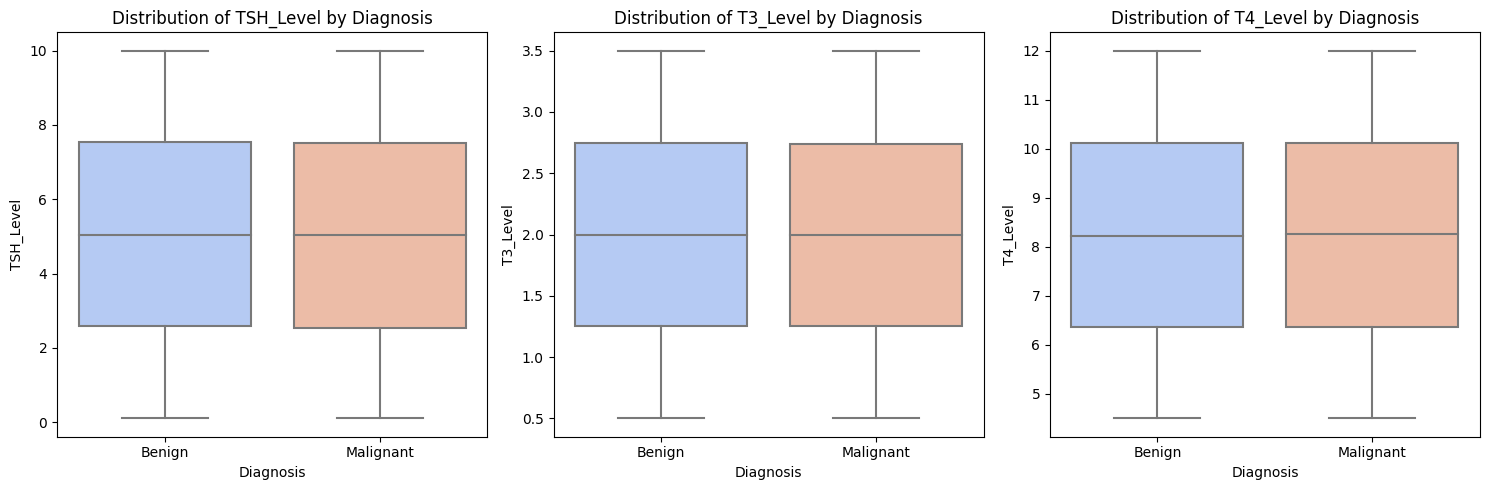

In [12]:
# 진단에 따른 호르몬 레벨 분포
plt.figure(figsize=(15, 5))

for i, hormone in enumerate(hormone_levels, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=data, x=diagnosis_category, y=hormone, palette="coolwarm")
    plt.title(f"Distribution of {hormone} by Diagnosis")
    plt.xlabel("Diagnosis")
    plt.ylabel(hormone)

plt.tight_layout()
plt.show()

In [13]:
variables = ["Age", "Nodule_Size"]

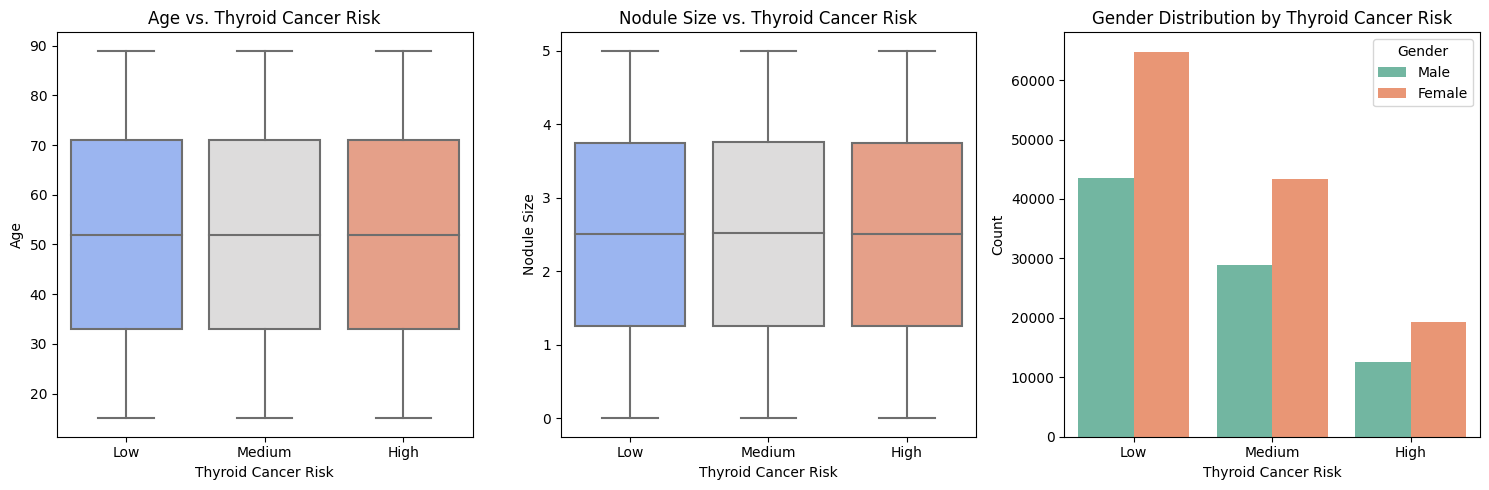

In [14]:
plt.figure(figsize=(15, 5))

# Age vs. Cancer Risk
plt.subplot(1, 3, 1)
sns.boxplot(data=data, x=risk_category, y="Age", palette="coolwarm")
plt.title("Age vs. Thyroid Cancer Risk")
plt.xlabel("Thyroid Cancer Risk")
plt.ylabel("Age")

# Nodule Size vs. Cancer Risk
plt.subplot(1, 3, 2)
sns.boxplot(data=data, x=risk_category, y="Nodule_Size", palette="coolwarm")
plt.title("Nodule Size vs. Thyroid Cancer Risk")
plt.xlabel("Thyroid Cancer Risk")
plt.ylabel("Nodule Size")

# Risk Category에 따른 성별 분포
plt.subplot(1, 3, 3)
sns.countplot(data=data, x=risk_category, hue="Gender", palette="Set2")
plt.title("Gender Distribution by Thyroid Cancer Risk")
plt.xlabel("Thyroid Cancer Risk")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [15]:
# 범주형 변수 정의
categorical_columns = ["Gender", "Country", "Ethnicity"]

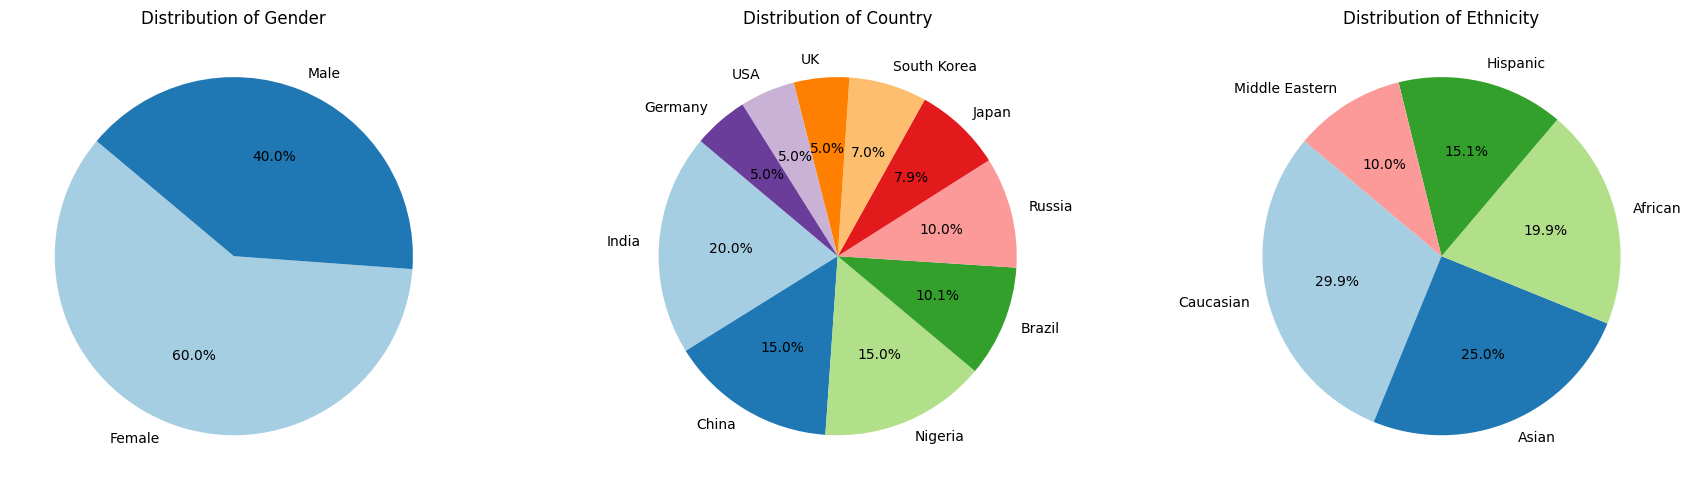

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Generate pie charts for each category
for i, column in enumerate(categorical_columns):
    data_counts = data[column].value_counts()
    axes[i].pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    axes[i].set_title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

### ML

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
import catboost as cb
import optuna
import xgboost as xgb
from sklearn.model_selection import cross_val_score

In [18]:
data

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,212687,58,Female,India,Asian,No,No,No,No,Yes,No,2.00,0.64,11.92,1.48,Low,Benign
212687,212688,89,Male,Japan,Middle Eastern,No,No,No,No,Yes,No,9.77,3.25,7.30,4.46,Medium,Benign
212688,212689,72,Female,Nigeria,Hispanic,No,No,No,No,No,Yes,7.72,2.44,8.71,2.36,Medium,Benign
212689,212690,85,Female,Brazil,Middle Eastern,No,No,No,No,No,Yes,5.62,2.53,9.62,1.54,Medium,Benign


In [19]:
df = data.copy()

In [20]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency

# 타겟 변수 (Diagnosis)
y_col = "Diagnosis"
y = df[y_col]

# 독립 변수(X) 설정 (Patient_ID 제거)
X = df.drop(columns=[y_col, "Patient_ID", "Country"])

# 연속형 변수 (float, int)와 범주형 변수 분리
continuous_vars = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_vars = X.select_dtypes(include=["object"]).columns.tolist()

significant_features = []
alpha = 0.05  # 유의수준

# 연속형 변수: t-test 수행 (Diagnosis가 이진 변수(0,1)인 경우)
for col in continuous_vars:
    groups = df[y_col].unique()
    if len(groups) == 2:
        group1 = df[df[y_col] == groups[0]][col]
        group2 = df[df[y_col] == groups[1]][col]
        stat, p_value = ttest_ind(group1, group2, equal_var=False, nan_policy='omit')
        if p_value < alpha:
            significant_features.append(col)
    else:
        # 다중 그룹인 경우 ANOVA 사용
        from scipy.stats import f_oneway
        grouped_data = [df[df[y_col] == group][col] for group in groups]
        stat, p_value = f_oneway(*grouped_data)
        if p_value < alpha:
            significant_features.append(col)

# 범주형 변수: 카이제곱 검정 수행
for col in categorical_vars:
    contingency_table = pd.crosstab(df[col], df[y_col])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    if p_value < alpha:
        significant_features.append(col)

print("✅ 유의미한 feature:", significant_features)

✅ 유의미한 feature: ['Ethnicity', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 'Thyroid_Cancer_Risk']


In [21]:
df_encoded = pd.get_dummies(df, columns=['Ethnicity', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 'Thyroid_Cancer_Risk'], drop_first=True)

# 'Ethnicity', 'Family_History' 등의 컬럼명을 포함하는 새로운 컬럼 찾기
dummy_cols = [col for col in df_encoded.columns if any(prefix in col for prefix in ['Ethnicity', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 'Thyroid_Cancer_Risk'])]

print("🆕 생성된 더미 변수 컬럼들:", dummy_cols)

🆕 생성된 더미 변수 컬럼들: ['Ethnicity_Asian', 'Ethnicity_Caucasian', 'Ethnicity_Hispanic', 'Ethnicity_Middle Eastern', 'Family_History_Yes', 'Radiation_Exposure_Yes', 'Iodine_Deficiency_Yes', 'Thyroid_Cancer_Risk_Low', 'Thyroid_Cancer_Risk_Medium']


In [22]:
X = df_encoded[['Ethnicity_Asian', 'Ethnicity_Caucasian', 'Ethnicity_Hispanic', 'Ethnicity_Middle Eastern', 'Family_History_Yes', 'Radiation_Exposure_Yes', 'Iodine_Deficiency_Yes', 'Thyroid_Cancer_Risk_Low', 'Thyroid_Cancer_Risk_Medium']]
y = df['Diagnosis']

In [23]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding 수행
le = LabelEncoder()
y_train = le.fit_transform(y_train)  # 'Benign' -> 0, 'Malignant' -> 1
y_test = le.transform(y_test)  

In [25]:
X.info() # 전부 범주형 컬럼

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Ethnicity_Asian             212691 non-null  bool 
 1   Ethnicity_Caucasian         212691 non-null  bool 
 2   Ethnicity_Hispanic          212691 non-null  bool 
 3   Ethnicity_Middle Eastern    212691 non-null  bool 
 4   Family_History_Yes          212691 non-null  bool 
 5   Radiation_Exposure_Yes      212691 non-null  bool 
 6   Iodine_Deficiency_Yes       212691 non-null  bool 
 7   Thyroid_Cancer_Risk_Low     212691 non-null  bool 
 8   Thyroid_Cancer_Risk_Medium  212691 non-null  bool 
dtypes: bool(9)
memory usage: 1.8 MB


In [26]:
# # 스케일링
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [27]:
# 1. Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
log_acc = accuracy_score(y_test, y_pred_log)
print(f'Logistic Regression Accuracy: {log_acc:.4f}')

Logistic Regression Accuracy: 0.8251


### Random Forest

In [28]:
# 2. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {rf_acc:.4f}')

Random Forest Accuracy: 0.8251


### Decision Tree

In [116]:
dt_params = {'max_depth': [3, 5, 10, 15, None]}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)
dt_best = dt_grid.best_estimator_

y_pred_dt = dt_best.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

print("🔹 Decision Tree Results:")
print("Best Parameters:", dt_grid.best_params_)
print("Accuracy:", acc_dt)
print(classification_report(y_test, y_pred_dt))

🔹 Decision Tree Results:
Best Parameters: {'max_depth': 3}
Accuracy: 0.8250546557276852
              precision    recall  f1-score   support

      Benign       0.85      0.94      0.89     32615
   Malignant       0.69      0.45      0.54      9924

    accuracy                           0.83     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.83      0.81     42539



### XGBoost

In [125]:
# Optuna 로그 레벨 최소화
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Optuna 최적화 함수 정의

def optimize_xgb(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'random_state': 42,
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }
    model = xgb.XGBClassifier(**param)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

xgb_study = optuna.create_study(direction='maximize')
xgb_study.optimize(optimize_xgb, n_trials=50, show_progress_bar=True)

print("🔹 XGBoost 최적의 파라미터:", xgb_study.best_params)
print("🔹 XGBoost 최적의 정확도:", xgb_study.best_value)
# 🔹 XGBoost 최적의 파라미터: {'n_estimators': 422, 'learning_rate': 0.07995383430372216, 'max_depth': 9, 'subsample': 0.863105981286201, 'colsample_bytree': 0.6220996040429215}
# 🔹 XGBoost 최적의 정확도: 0.8279303289986597

  0%|          | 0/50 [00:00<?, ?it/s]

🔹 XGBoost 최적의 파라미터: {'n_estimators': 422, 'learning_rate': 0.07995383430372216, 'max_depth': 9, 'subsample': 0.863105981286201, 'colsample_bytree': 0.6220996040429215}
🔹 XGBoost 최적의 정확도: 0.8279303289986597


In [126]:
xgb_model = xgb.XGBClassifier(**xgb_study.best_params)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("🔹 XGBoost Results:")
print("Accuracy:", acc_xgb)
print(classification_report(y_test, y_pred_xgb))
print("-" * 50)

🔹 XGBoost Results:
Accuracy: 0.8250546557276852
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32615
           1       0.69      0.45      0.54      9924

    accuracy                           0.83     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.83      0.81     42539

--------------------------------------------------


### LightGBM

In [128]:
# LightGBM 최적화

def optimize_lgb(trial):
    param = {
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'random_state': 42,
        'force_col_wise': True
    }
    model = lgb.LGBMClassifier(**param)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

lgb_study = optuna.create_study(direction='maximize')
lgb_study.optimize(optimize_lgb, n_trials=50, show_progress_bar=True)

print("🔹 LightGBM 최적의 파라미터:", lgb_study.best_params)
print("🔹 LightGBM 최적의 정확도:", lgb_study.best_value)

  0%|          | 0/50 [00:00<?, ?it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 31656, number of negative: 104465
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 136121, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.232558 -> initscore=-1.193924
[LightGBM] [Info] Start training from score -1.193924
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 31657, number of negative: 104464
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 136121, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.232565 -> initscore=-1.193883
[LightGBM] [Info] Start training from score -1.193883
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 31657, number of negative: 104465
[LightGBM] [Info] Total Bi

In [129]:
lgb_model = lgb.LGBMClassifier(**lgb_study.best_params)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
acc_lgb = accuracy_score(y_test, y_pred_lgb)
print("🔹 LightGBM Results:")
print("Accuracy:", acc_lgb)
print(classification_report(y_test, y_pred_lgb))
print("-" * 50)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 39571, number of negative: 130581
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 170152, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.232563 -> initscore=-1.193897
[LightGBM] [Info] Start training from score -1.193897
🔹 LightGBM Results:
Accuracy: 0.8250546557276852
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32615
           1       0.69      0.45      0.54      9924

    accuracy                           0.83     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.83      0.8

### Catboost

In [29]:
# CatBoost 최적화

def optimize_cat(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 100, 500),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_seed': 42,
        'verbose': 0
    }
    model = cb.CatBoostClassifier(**param)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

cat_study = optuna.create_study(direction='maximize')
cat_study.optimize(optimize_cat, n_trials=50, show_progress_bar=True)

print("🔹 CatBoost 최적의 파라미터:", cat_study.best_params)
print("🔹 CatBoost 최적의 정확도:", cat_study.best_value)

[I 2025-02-27 11:57:10,530] A new study created in memory with name: no-name-c10a3a25-cb58-4bac-85e1-49a27aa37a9f


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-02-27 11:57:15,279] Trial 0 finished with value: 0.8279303289986597 and parameters: {'iterations': 110, 'depth': 5, 'learning_rate': 0.042905652520680196, 'l2_leaf_reg': 6.79650252876225, 'border_count': 195}. Best is trial 0 with value: 0.8279303289986597.
[I 2025-02-27 11:57:30,223] Trial 1 finished with value: 0.8279303289986597 and parameters: {'iterations': 237, 'depth': 9, 'learning_rate': 0.035945396894762935, 'l2_leaf_reg': 7.731962137515776, 'border_count': 220}. Best is trial 0 with value: 0.8279303289986597.
[I 2025-02-27 11:57:47,774] Trial 2 finished with value: 0.8279303289986597 and parameters: {'iterations': 293, 'depth': 9, 'learning_rate': 0.05719986009044363, 'l2_leaf_reg': 1.056712225182652, 'border_count': 228}. Best is trial 0 with value: 0.8279303289986597.
[I 2025-02-27 11:58:10,070] Trial 3 finished with value: 0.8279303289986597 and parameters: {'iterations': 369, 'depth': 7, 'learning_rate': 0.07548288997557988, 'l2_leaf_reg': 9.364731932086398, 'bord

In [31]:
cat_model = cb.CatBoostClassifier(**cat_study.best_params)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)
acc_cat = accuracy_score(y_test, y_pred_cat)
print("🔹 CatBoost Results:")
print("Accuracy:", acc_cat)
print(classification_report(y_test, y_pred_cat))
print("-" * 50)

0:	learn: 0.6746100	total: 9.09ms	remaining: 991ms
1:	learn: 0.6576043	total: 16.9ms	remaining: 910ms
2:	learn: 0.6420061	total: 30ms	remaining: 1.07s
3:	learn: 0.6276343	total: 37.5ms	remaining: 994ms
4:	learn: 0.6144430	total: 47.2ms	remaining: 992ms
5:	learn: 0.6022541	total: 55.9ms	remaining: 969ms
6:	learn: 0.5910396	total: 67.1ms	remaining: 988ms
7:	learn: 0.5806571	total: 74.7ms	remaining: 952ms
8:	learn: 0.5710868	total: 85ms	remaining: 954ms
9:	learn: 0.5622305	total: 95.2ms	remaining: 952ms
10:	learn: 0.5540067	total: 108ms	remaining: 975ms
11:	learn: 0.5464198	total: 119ms	remaining: 971ms
12:	learn: 0.5393734	total: 129ms	remaining: 961ms
13:	learn: 0.5328356	total: 136ms	remaining: 932ms
14:	learn: 0.5267872	total: 146ms	remaining: 926ms
15:	learn: 0.5211943	total: 154ms	remaining: 905ms
16:	learn: 0.5159669	total: 163ms	remaining: 891ms
17:	learn: 0.5111520	total: 172ms	remaining: 877ms
18:	learn: 0.5066747	total: 180ms	remaining: 864ms
19:	learn: 0.5025209	total: 188ms	r

### Result

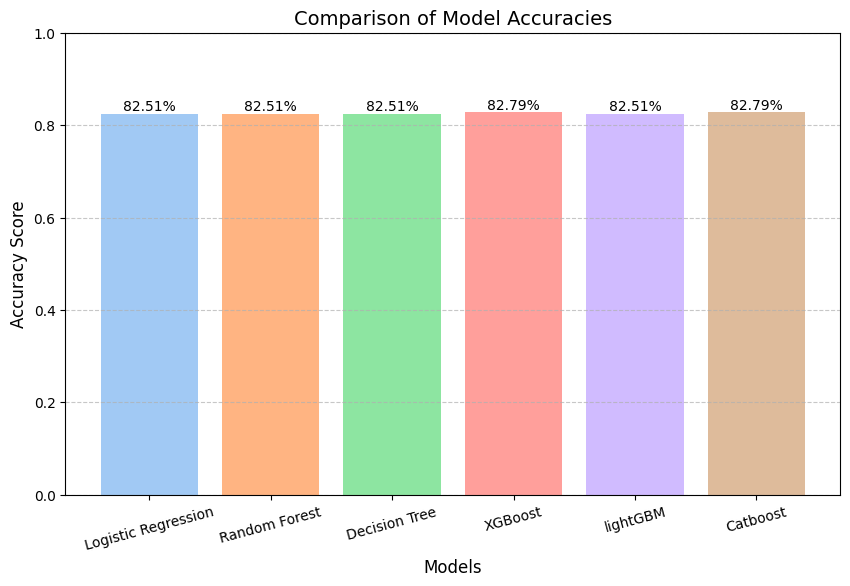

In [33]:
# 정확도 한눈에 비교하기

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 모델명과 정확도 리스트
models = [
    "Logistic Regression", "Random Forest", "Decision Tree", 
    "XGBoost", "lightGBM", "Catboost"
]
accuracies = [0.8251, 0.8251, 0.8251, 0.8279, 0.8251, 0.8279]  # 제공된 정확도 값

colors = sns.color_palette("pastel", len(models))

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=colors, linewidth=1.2)

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{acc:.2%}",
             ha="center", va="bottom", fontsize=10)

plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy Score", fontsize=12)
plt.title("Comparison of Model Accuracies", fontsize=14)
plt.xticks(rotation=15)
plt.ylim(0,1)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()
